In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
train_data=pd.read_csv("train.csv")

In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train_data[["Survived","Sex"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_data["Name"]]
train_data["Title"]=dataset_title

In [6]:
train_data["Title"].value_counts()
train_data["Title"]=train_data["Title"].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'the Countess', 'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'],"Other")
train_data["Title"]=train_data["Title"].map({'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5})

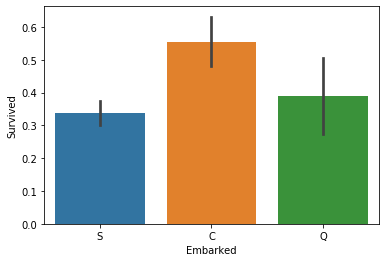

In [7]:
sns.barplot(x='Embarked',y='Survived',data=train_data)

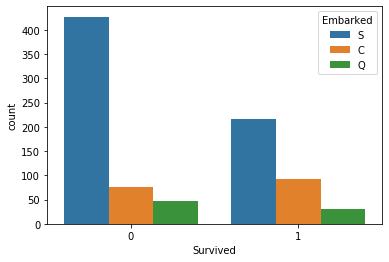

In [8]:
sns.countplot(x='Survived',hue='Embarked',data=train_data)

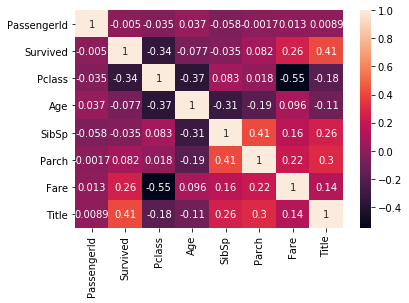

In [9]:
sns.heatmap(train_data.corr(),annot=True)

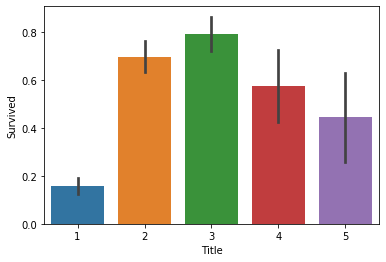

In [10]:
sns.barplot(x='Title',y='Survived',data=train_data)

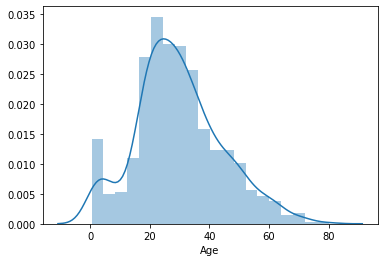

In [11]:
sns.distplot(train_data["Age"])

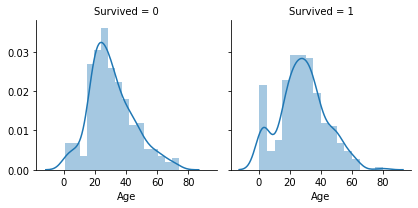

In [12]:
# Explore Age vs Survived
g = sns.FacetGrid(train_data, col='Survived')
g = g.map(sns.distplot, "Age")

In [13]:
train_data=train_data[train_data["Embarked"].notnull()]
#train_data['Embarked']=train_data['Embarked'].fillna("S")

In [14]:
#train_data[["FareBand", "Survived"]].groupby(['FareBand'], as_index=False).mean()

In [15]:
#fig, axes = plt.subplots(1, 1, figsize=(65,30))
#sns.countplot(x="Age",hue="Survived",data=train_data,ax=axes)

In [16]:
train_data["Family"]=train_data["SibSp"]+train_data["Parch"]+1

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


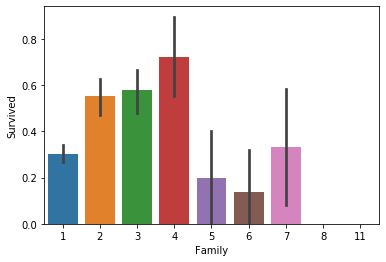

In [17]:
sns.barplot(x="Family",y="Survived",data=train_data)

In [18]:
train_data['Single'] = train_data['Family'].map(lambda s: 1 if s == 1 else 0)
train_data['SmallF'] = train_data['Family'].map(lambda s: 1 if  s == 2  else 0)
train_data['MedF'] = train_data['Family'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train_data['LargeF'] = train_data['Family'].map(lambda s: 1 if s >= 5 else 0)

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [19]:
train_data["Age"]=train_data["Age"].fillna(value=train_data["Age"][train_data["Age"].notnull()].median())
#train_data["SibSp"]=train_data["SibSp"].apply(lambda x:1 if x==1 or x==2 else 0)
#train_data["Parch"]=train_data["Parch"].apply(lambda x:1 if x==1 or x==2 or x==3 else 0)


/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
train_data["child"]=train_data["Age"].apply(lambda x:1 if x<=18 else 0)


/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
train_data=pd.get_dummies(train_data,columns=["Sex"])
train_data=pd.get_dummies(train_data,columns=["Embarked"])
train_data=pd.get_dummies(train_data,columns=["Pclass"])

In [22]:
train_data["Sex_female"][train_data["child"]==1]=0

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
train_data["Sex_male"][train_data["child"]==1]=0

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
train_data["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[["AgeBand", "Survived"]].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.401070
3,"(48.168, 64.084]",0.426471
4,"(64.084, 80.0]",0.090909


In [26]:
train_data['FareBand'] = pd.cut(train_data['Fare'], 4)
train_data[["FareBand", "Survived"]].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.512, 128.082]",0.366627
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [27]:
train_data["Age"][train_data["Age"]<16.4]=0
train_data["Age"][(train_data["Age"]>16.4) & (train_data["Age"]<32.3)]=1
train_data["Age"][(train_data["Age"]>32.3)]=2


/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

In [28]:
train_data.head(15)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,AgeBand,FareBand
0,1,0,"Braund, Mr. Owen Harris",1.0,1,0,A/5 21171,7.2500,NaN,1,...,0,1,0,0,1,0,0,1,"(16.336, 32.252]","(-0.512, 128.082]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0,1,0,PC 17599,71.2833,C85,3,...,1,0,1,0,0,1,0,0,"(32.252, 48.168]","(-0.512, 128.082]"
2,3,1,"Heikkinen, Miss. Laina",1.0,0,0,STON/O2. 3101282,7.9250,NaN,2,...,1,0,0,0,1,0,0,1,"(16.336, 32.252]","(-0.512, 128.082]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0,1,0,113803,53.1000,C123,3,...,1,0,0,0,1,1,0,0,"(32.252, 48.168]","(-0.512, 128.082]"
4,5,0,"Allen, Mr. William Henry",2.0,0,0,373450,8.0500,NaN,1,...,0,1,0,0,1,0,0,1,"(32.252, 48.168]","(-0.512, 128.082]"
5,6,0,"Moran, Mr. James",1.0,0,0,330877,8.4583,NaN,1,...,0,1,0,1,0,0,0,1,"(16.336, 32.252]","(-0.512, 128.082]"
6,7,0,"McCarthy, Mr. Timothy J",2.0,0,0,17463,51.8625,E46,1,...,0,1,0,0,1,1,0,0,"(48.168, 64.084]","(-0.512, 128.082]"
7,8,0,"Palsson, Master. Gosta Leonard",0.0,3,1,349909,21.0750,NaN,4,...,0,0,0,0,1,0,0,1,"(0.34, 16.336]","(-0.512, 128.082]"
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,0,2,347742,11.1333,NaN,3,...,1,0,0,0,1,0,0,1,"(16.336, 32.252]","(-0.512, 128.082]"
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,1,0,237736,30.0708,NaN,3,...,0,0,1,0,0,0,1,0,"(0.34, 16.336]","(-0.512, 128.082]"


In [29]:
train_data["Fare"][train_data["Fare"]<8]=0
train_data["Fare"][(train_data["Fare"]>8) & (train_data["Fare"]<24)]=1
train_data["Fare"][(train_data["Fare"]>24) & (train_data["Fare"]<61)]=2
train_data["Fare"][train_data["Fare"]>61]=3

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

In [30]:
train_data["Fare"]

0      0.0
1      3.0
2      0.0
3      2.0
4      1.0
      ... 
886    1.0
887    2.0
888    1.0
889    2.0
890    0.0
Name: Fare, Length: 889, dtype: float64

In [31]:
train_data=train_data.drop(["Cabin","Ticket","AgeBand","FareBand","Name","Family"],axis=1)


In [32]:
#train_data['Sex'] = train_data['Sex'].map({'male': 0,'female': 1})


In [33]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Single,SmallF,MedF,LargeF,child,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,1.0,1,0,0.0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
1,2,1,2.0,1,0,3.0,3,0,1,0,0,0,1,0,1,0,0,1,0,0
2,3,1,1.0,0,0,0.0,2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,4,1,2.0,1,0,2.0,3,0,1,0,0,0,1,0,0,0,1,1,0,0
4,5,0,2.0,0,0,1.0,1,1,0,0,0,0,0,1,0,0,1,0,0,1


In [34]:
#train_data=pd.get_dummies(train_data,columns=["Embarked"])

In [35]:
features_list=["Title","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male","Single","SmallF","LargeF","MedF","Fare","Age","child","Embarked_C","Embarked_S","Embarked_Q"]
l=[]

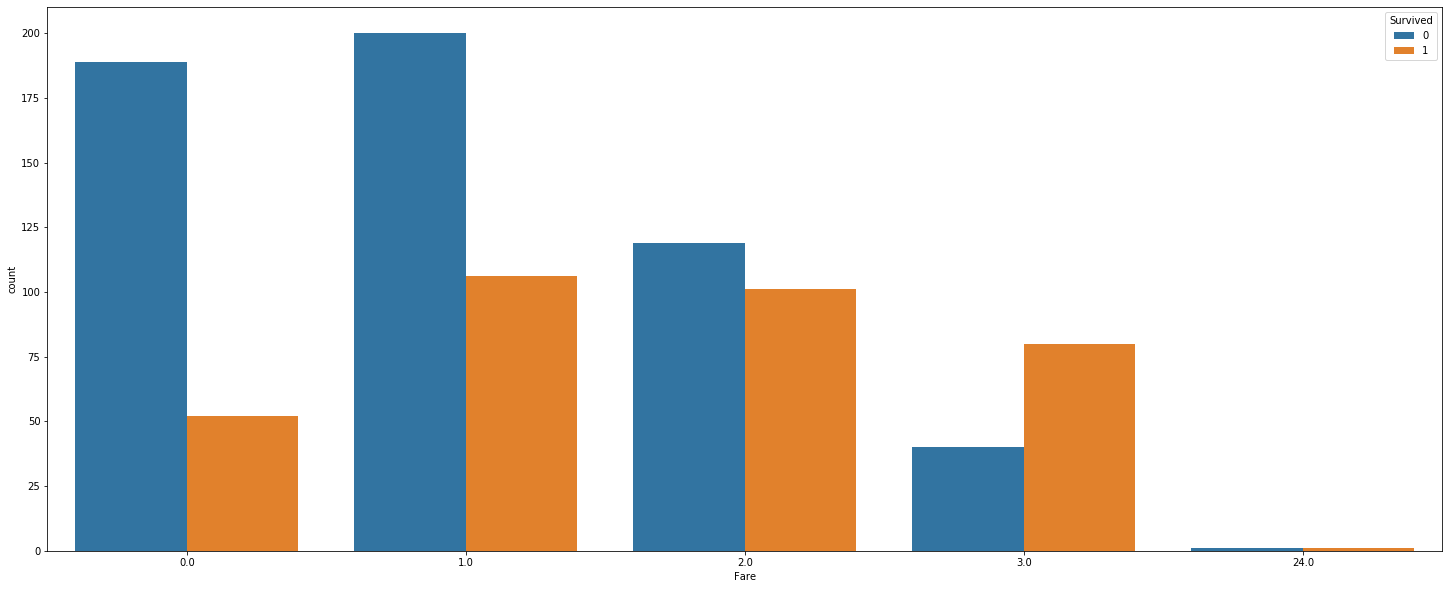

In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(x="Fare",hue="Survived",data=train_data,ax=axes)

# for f in features_list:
    for z in train_data[f].unique():
        x=train_data[train_data[f] == z]["Survived"]
        l.append(z)
        l.append(sum(x)/len(x))
        

In [37]:
#l

In [38]:
x_train=train_data[features_list]

In [39]:
y_train=train_data["Survived"]

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model=RandomForestClassifier(n_estimators=100)

In [42]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
test_data=pd.read_csv("test.csv")

In [44]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in test_data["Name"]]
test_data["Title"]=dataset_title

In [47]:
test_data["Title"].value_counts()
test_data["Title"]=test_data["Title"].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'the Countess', 'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'],"Other")
test_data["Title"]=test_data["Title"].map({'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5})

In [48]:
pd.Series(abs(np.random.normal(30,14.8,size=86)))

0     13.704210
1      7.131848
2     25.901358
3     17.008666
4     21.921194
        ...    
81    30.450554
82    41.169767
83     1.665131
84    27.717167
85    44.854212
Length: 86, dtype: float64

In [49]:
test_data["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [50]:
test_data=test_data[test_data["Embarked"].notnull()]
test_data["Age"]=test_data["Age"].fillna(value=test_data["Age"][test_data["Age"].notnull()].median())
test_data["Fare"]=test_data["Fare"].fillna(value=np.mean(test_data["Fare"]))

In [51]:
test_data=pd.get_dummies(test_data,columns=["Sex"])

In [52]:
test_data=pd.get_dummies(test_data,columns=["Embarked"])

In [53]:
test_data=pd.get_dummies(test_data,columns=["Pclass"])

In [54]:
test_data["child"]=test_data["Age"].apply(lambda x:1 if x<=18 else 0)

In [55]:
test_data["Sex_female"][test_data["child"]==1]=0

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
test_data["Sex_male"][test_data["child"]==1]=0

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test_data["Age"][test_data["Age"]<16.4]=0
test_data["Age"][(test_data["Age"]>16.4) & (test_data["Age"]<32.3)]=1
test_data["Age"][(test_data["Age"]>32.3)]=2


/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

In [58]:
test_data["Fare"][test_data["Fare"]<8]=0
test_data["Fare"][(test_data["Fare"]>8) & (test_data["Fare"]<24)]=1
test_data["Fare"][(test_data["Fare"]>24) & (test_data["Fare"]<61)]=2
test_data["Fare"][test_data["Fare"]>61]=3

/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishalduhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

In [59]:
test_data["Family"]=test_data["SibSp"]+train_data["Parch"]+1

In [60]:
test_data['Single'] = test_data['Family'].map(lambda s: 1 if s == 1 else 0)
test_data['SmallF'] = test_data['Family'].map(lambda s: 1 if  s == 2  else 0)
test_data['MedF'] = test_data['Family'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test_data['LargeF'] = test_data['Family'].map(lambda s: 1 if s >= 5 else 0)

In [61]:
test_data=test_data.drop(["Cabin","Ticket","Name"],axis=1)

In [62]:
test_data

,PassengerId,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,child,Family,Single,SmallF,MedF,LargeF
0,892,2.0,0,0,0.0,1,0,1,0,1,0,0,0,1,0,1.0,1,0,0,0
1,893,2.0,1,0,0.0,3,1,0,0,0,1,0,0,1,0,2.0,0,1,0,0
2,894,2.0,0,0,1.0,1,0,1,0,1,0,0,1,0,0,1.0,1,0,0,0
3,895,1.0,0,0,1.0,1,0,1,0,0,1,0,0,1,0,1.0,1,0,0,0
4,896,1.0,1,1,1.0,3,1,0,0,0,1,0,0,1,0,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1.0,0,0,1.0,1,0,1,0,0,1,0,0,1,0,1.0,1,0,0,0
414,1306,2.0,0,0,3.0,5,1,0,1,0,0,1,0,0,0,1.0,1,0,0,0
415,1307,2.0,0,0,0.0,1,0,1,0,0,1,0,0,1,0,1.0,1,0,0,0
416,1308,1.0,0,0,1.0,1,0,1,0,0,1,0,0,1,0,2.0,0,1,0,0


In [63]:
model.score(x_train,y_train)

0.875140607424072

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
np.mean(cross_val_score(model,x_train,y_train,cv=5))

0.8234241096933917

In [66]:
test_pred=model.predict(test_data[features_list])

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
submit_df=pd.DataFrame(index=None)
submit_df["PassengerId"]=test_data["PassengerId"]

In [70]:
submit_df["Survived"]=test_pred

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model2=DecisionTreeClassifier()

In [73]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
model2.score(x_train,y_train)

0.875140607424072

In [75]:
submit_df.to_csv("prediction1.csv")

In [76]:
submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
